In [1]:
import os, sys

# Get the absolute path of the notebook's directory
notebook_dir = os.getcwd()

# Navigate to the parent directory
parent_dir = os.path.abspath(os.path.join(notebook_dir, ".."))

# Add the parent directory to sys.path so we can import modules
sys.path.append(parent_dir)

# Verify the path
print(f"Added to sys.path: {parent_dir}")

# Add it to sys.path
sys.path.append(parent_dir)

from FlashOperation.Refrig2DrumHeatExConstrDummy import Refrig2DrumConstraintHeatExConstDummy
from module import *
import pandas as pd

Added to sys.path: /Users/panwapromtep/Library/CloudStorage/OneDrive-JohnsHopkins/Process Design/Aspen


In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pickle
import os

# Define the file path for saving/loading the data
data_file = "flash_simulation_data_sim_new.pkl"

# Define parameter ranges
flash_1_range_sim = np.linspace(-15, 15, 10)
flash_2_range_sim = np.linspace(-15, 15, 10)

print("Generating new data...")
assSim = Refrig2DrumConstraintHeatExConstDummy(AspenFile="../FlashOperation/FlashOperation_HeatExchanger.bkp",
                                        wdpath="../FlashOperation",
                                        visibility=False,
                                        Penalty=1e3)
data_sim = []
for flash_1 in flash_1_range_sim:
    for flash_2 in flash_2_range_sim:
        x_unflat = assSim.unflatten_params([float(flash_1), float(flash_2)])
        data_sim.append([flash_1, flash_2, assSim.run_obj(x_unflat)])

data_sim = np.array(data_sim)

Generating new data...
⚠️ Dummy Mode: Skipping Aspen simulation initialization.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

def plot_contour_surface(data, x_label, y_label, z_label, x_point=None, gradient=None):
    """
    Generate a high-resolution heatmap with contour lines based on the given 3D data.
    Optionally overlays a single point (x_point) and its gradient vector on the plot.
    """
    # Convert data to numpy array for easier manipulation
    data = np.array(data)
    x, y, z = data[:, 0], data[:, 1], data[:, 2]

    # Generate a finer grid for interpolation
    grid_x, grid_y = np.meshgrid(
        np.linspace(x.min(), x.max(), 200),
        np.linspace(y.min(), y.max(), 200)
    )
    
    # Interpolate z values using cubic interpolation
    grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

    # Create the heatmap and add contour lines
    plt.figure(figsize=(8, 6))
    plt.imshow(grid_z, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis', aspect='auto')
    plt.colorbar(label=z_label)

    contour_levels = np.linspace(np.nanmin(grid_z), np.nanmax(grid_z), 15)
    plt.contour(grid_x, grid_y, grid_z, levels=contour_levels, colors='black', linewidths=0.8)
    
    # Plot the true optimal point
    true_optimal = np.array([-1.11, -0.5])
    plt.scatter(true_optimal[0], true_optimal[1], color='blue', zorder=5)
    plt.text(true_optimal[0], true_optimal[1], 'True Optimal', color='white', fontsize=10, ha='right')
    
    # Plot the local minimum points
    local_minima = [np.array([0.84, -0.5]), np.array([0.27, -0.5])]
    for lm in local_minima:
        plt.scatter(lm[0], lm[1], color='orange', zorder=5)
        plt.text(lm[0], lm[1], 'Local Min', color='orange', fontsize=10, ha='right')
    
    # Overlay the x point and gradient arrow if provided
    if x_point is not None and gradient is not None:
        # Convert the x and grad lists to NumPy arrays with float type
        gradient = np.asarray(gradient, dtype=float) # grad is grad_pred.tolist() passed in
        plt.quiver(
            x_point[0], x_point[1],
            gradient[0], gradient[1],
            color='red', angles='xy', scale_units='xy', scale=0.1, zorder=10
        )
        plt.scatter(x_point[0], x_point[1], color='red', zorder=10)  # Mark the point
        plt.text(x_point[0], x_point[1], 'x_point', color='red', fontsize=10, ha='left')
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

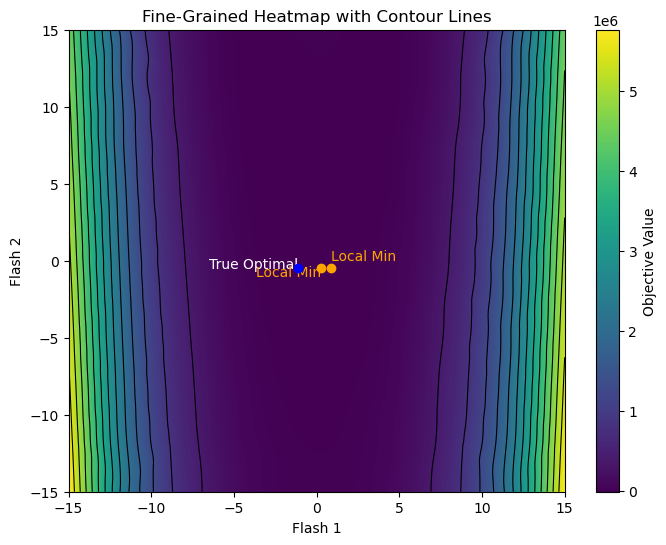

In [5]:
# Extract columns
x, y, z = data_sim[:, 0], data_sim[:, 1], data_sim[:, 2]

# Generate a finer grid for interpolation
grid_x, grid_y = np.meshgrid(
    np.linspace(x.min(), x.max(), 200),  # Increased resolution
    np.linspace(y.min(), y.max(), 200)
)

# Interpolate z values using cubic interpolation
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

# Create a high-resolution heatmap with contour lines
plt.figure(figsize=(8, 6))
plt.imshow(grid_z, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Objective Value')

# Add contour lines
contour_levels = np.linspace(grid_z.min(), grid_z.max(), 15)  # Define contour levels
plt.contour(grid_x, grid_y, grid_z, levels=contour_levels, colors='black', linewidths=0.8)

# Add labels and title
plt.xlabel('Flash 1')
plt.ylabel('Flash 2')
plt.title('Fine-Grained Heatmap with Contour Lines')

# Plot the true optimal point
true_optimal = np.array([-1.11, -0.5])
plt.scatter(true_optimal[0], true_optimal[1], color='blue', zorder=5)
plt.text(true_optimal[0], true_optimal[1], 'True Optimal', color='white', fontsize=10, ha='right')

# Plot the local minimum points
local_minima = [np.array([0.84, -0.5]), np.array([0.27, -0.5])]

plt.scatter(local_minima[0][0], local_minima[0][1], color='orange', zorder=5)
plt.text(local_minima[0][0], local_minima[0][1] + 0.5, 'Local Min', color='orange', fontsize=10, ha='left')

plt.scatter(local_minima[1][0], local_minima[1][1], color='orange', zorder=5)
plt.text(local_minima[1][0], local_minima[1][1] - 0.5, 'Local Min', color='orange', fontsize=10, ha='right')

# Show the plot
plt.show()


In [6]:
print(len(data_sim))
scaler = TorchMinMaxScaler((-1, 1), 
                           max_vals=[15.0, 15.0],
                           min_vals=[-15.0, -15.0],
                           min_y=0,
                           max_y=100,
                           scale_y=True)
#scale data_sim 
data_sim_xscaled, data_sim_yscaled = scaler.transform(data_sim[:, :2], data_sim[:, 2])

#recombine the data
data_sim_scaled = np.column_stack([data_sim_xscaled, data_sim_yscaled])

# **Initialize Model & Datasets**
old_dataset = OldDataSet(data_sim_scaled, k=15)
new_dataset = NewDataSet(k=14)
model = MLP(2, [20, 20,20], 1)

100


In [7]:
x_path_out, y_path_out = optimize_surrogate_model(model, 
                                          old_dataset,
                                          new_dataset, 
                                          assSim, 
                                          optim_steps=50, 
                                          N_s=2, 
                                          lr={"model learning rate": 1e-4, "input learning rate": 1e-4}, 
                                          merge_interval=5,
                                          x_init = torch.tensor([4, 4
                                                                 ], dtype=torch.float32, requires_grad=True),
                                            epochs = {"start":0, "during": 50},
                                            batch_size_old = 64,
                                            batch_size_new = 2,
                                            min_vals=scaler.min_x,
                                            max_vals=scaler.max_x,
                                          scaler= scaler,
                                          log_file = '../../Aspen/localityaware/opt_log2.csv',
                                          calls_log_file=  '../../Aspen/localityaware/calls_log2.csv',
                                          surface_log_folder = '../../Aspen/localityaware/surface2',
                                          device='cpu',
                                          lambda_mse=0,
                                          new_data_weight=2,
                                          upsteps=20,
                                          stddev=0.2,
                                          patience=10,
                                          tolerance = 1e-2
                                         )

device cpu
⚠️ No new data available, training only on old dataset.
tensor([[-15.0000, -15.0000],
        [-14.6970, -15.0000],
        [-14.3939, -15.0000],
        ...,
        [ 14.3939,  15.0000],
        [ 14.6970,  15.0000],
        [ 15.0000,  15.0000]])
[[ 4.8557224  4.8557224]
 [ 4.7851257  4.7851257]
 [ 4.7142715  4.7142715]
 ...
 [-2.524889  -2.524889 ]
 [-2.5161123 -2.5161123]
 [-2.5074635 -2.5074635]]
✅ Neural network surface saved at step 0: ../../Aspen/localityaware/surface2/surface_step_0.csv


TimeoutError: [Errno 60] Operation timed out: '../../Aspen/localityaware/opt_log2.csv'

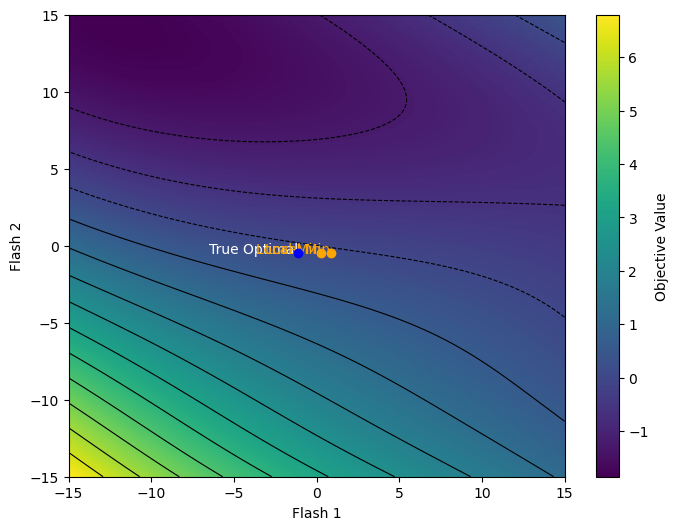

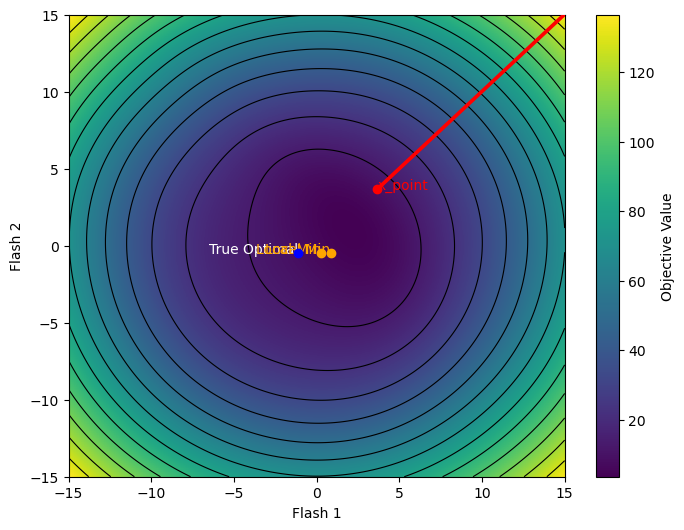

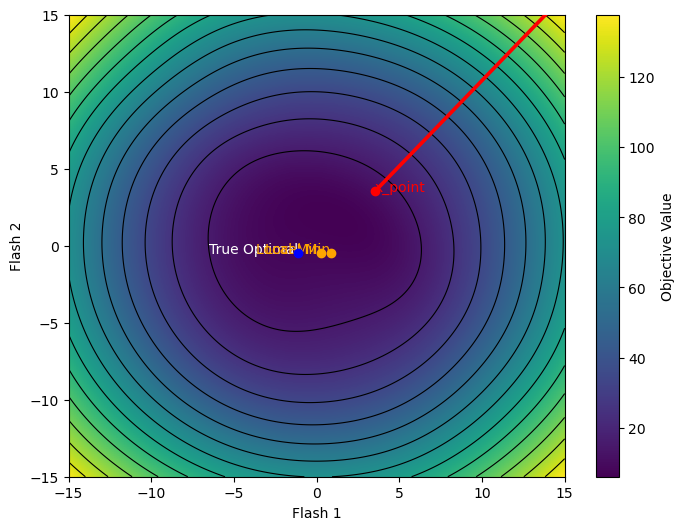

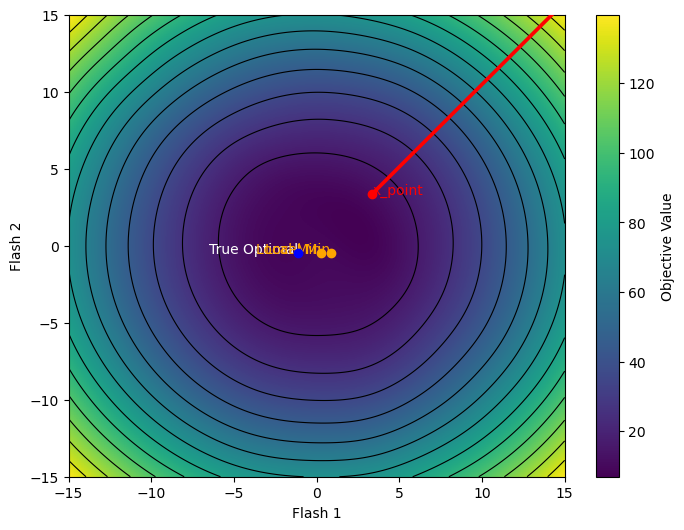

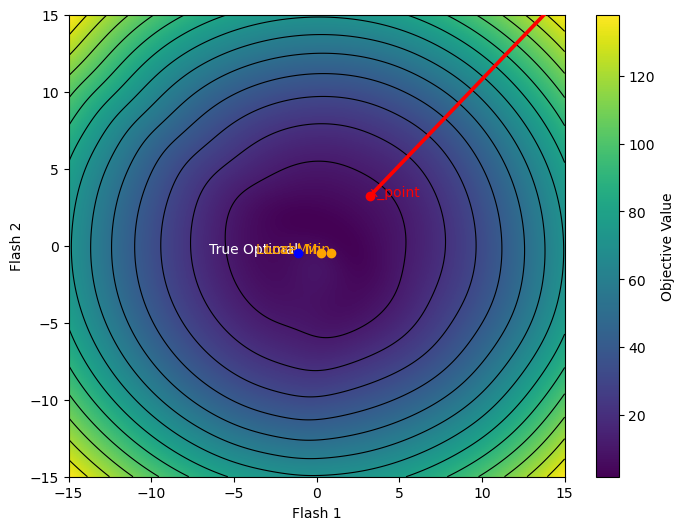

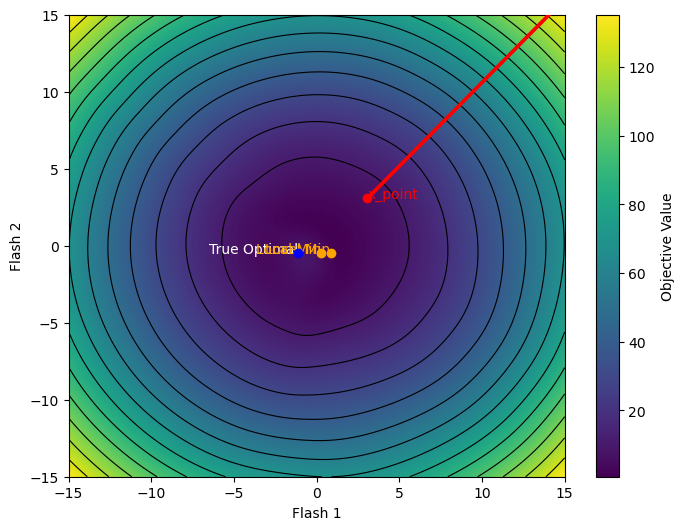

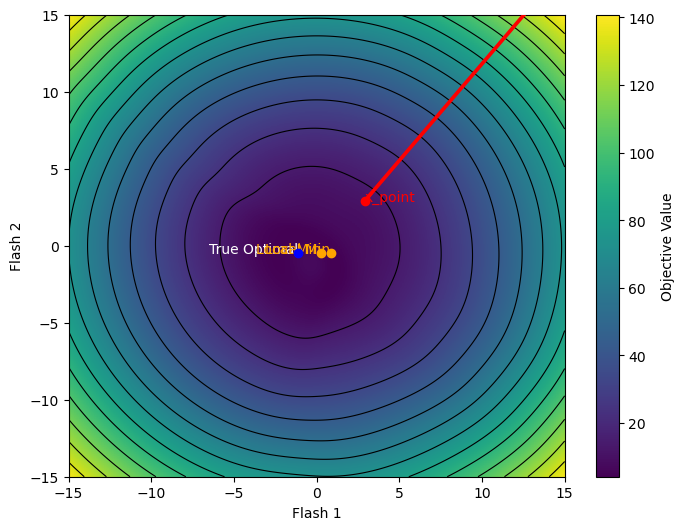

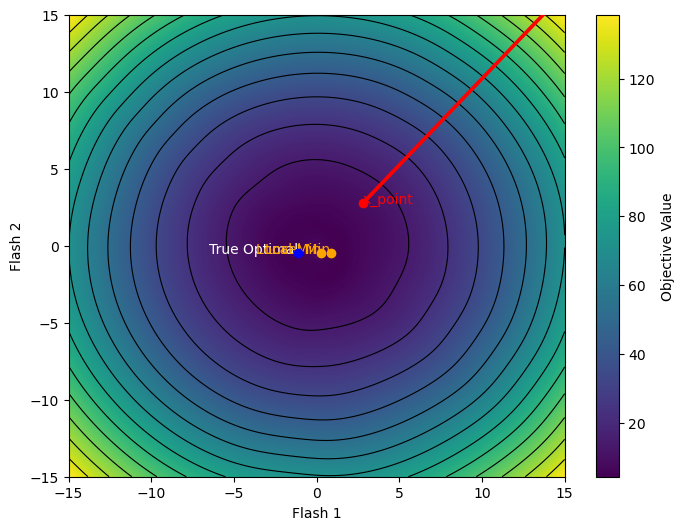

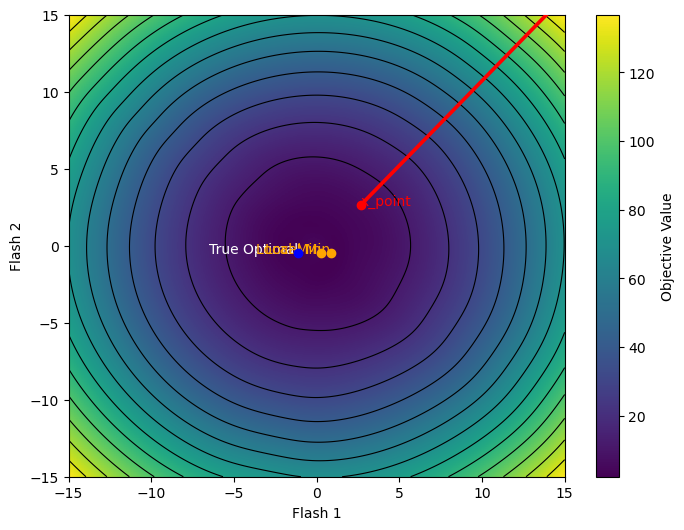

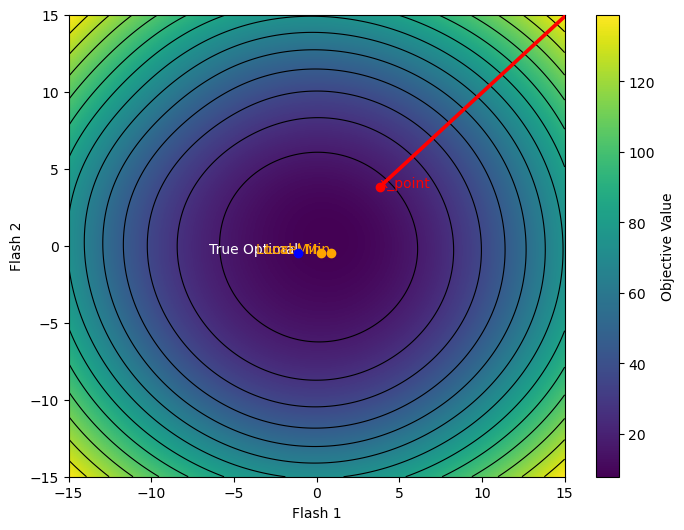

In [ ]:
surface_dir = "./surface2"
# Get a sorted list of surface files (i.e. files starting with "surface_step")
surface_files = sorted([f for f in os.listdir(surface_dir) if f.startswith("surface_step") and f.endswith('.csv')])

for surface_file in surface_files:
    # Extract the step number from the filename: "surface_step_{step}.csv"
    step = surface_file.split("_")[-1].split(".")[0]
    x_file = f"x_step_{step}.csv"
    grad_file = f"grad_step_{step}.csv"
    
    # Build full paths
    surface_path = os.path.join(surface_dir, surface_file)
    x_path = os.path.join(surface_dir, x_file)
    grad_path = os.path.join(surface_dir, grad_file)
    
    # Read the surface data (3 columns: x1, x2, NN Output)
    surface_data = pd.read_csv(surface_path).values
    
    # Read the associated x file (2 columns: x1, x2)
    if os.path.exists(x_path):
        x_df = pd.read_csv(x_path)
        x_point = x_df.iloc[0].values 
    else:
        x_point = None

    # Read the associated grad file (2 columns: grad_x1, grad_x2)
    if os.path.exists(grad_path):
        grad_df = pd.read_csv(grad_path)
        gradient = grad_df.iloc[0].apply(pd.to_numeric).values  
    else:
        gradient = None

    # Now call your plotting function with the surface data and the associated x_point and gradient
    plot_contour_surface(surface_data, 'Flash 1', 'Flash 2', 'Objective Value', x_point=x_point, gradient=gradient)
    
    # Optionally, delete the files after plotting
    os.remove(surface_path)
    if os.path.exists(x_path):
        os.remove(x_path)
    if os.path.exists(grad_path):
        os.remove(grad_path)

[[4.0, 4.0], [3.9700851440429688, 3.9701595306396484], [3.9367809295654297, 3.937807083129883], [3.9057788848876953, 3.9135475158691406], [3.8765525817871094, 3.8808441162109375], [3.8445816040039062, 3.848247528076172], [3.814502716064453, 3.8183860778808594], [3.78765869140625, 3.7957324981689453], [3.7589683532714844, 3.763700485229492], [3.7280845642089844, 3.7326202392578125], [3.6969833374023438, 3.7016372680664062], [3.6655101776123047, 3.6713333129882812], [3.639780044555664, 3.6440486907958984], [3.6091957092285156, 3.6142501831054688], [3.5792369842529297, 3.584217071533203], [3.54876708984375, 3.554830551147461], [3.5171432495117188, 3.5224761962890625], [3.4878902435302734, 3.4925613403320312], [3.4575061798095703, 3.4620132446289062], [3.427095413208008, 3.4320201873779297], [3.3969783782958984, 3.4022998809814453], [3.3675460815429688, 3.3730392456054688], [3.340940475463867, 3.343494415283203], [3.3084964752197266, 3.312732696533203], [3.2787399291992188, 3.2833156585693

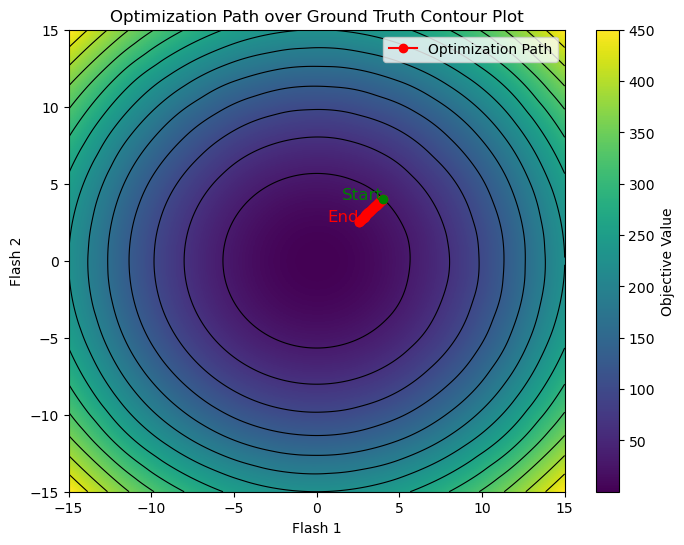

In [ ]:
# Convert x_path to numpy array if not already
print(x_path_out)
x_path = np.array(x_path_out)


# Extract the columns for x, y, and z from the ground truth data
x, y, z = data_sim[:, 0], data_sim[:, 1], data_sim[:, 2]

# Generate a finer grid for interpolation
grid_x, grid_y = np.meshgrid(
    np.linspace(x.min(), x.max(), 200),  # Increased resolution
    np.linspace(y.min(), y.max(), 200)
)

# Interpolate z values using cubic interpolation
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

# Create a high-resolution heatmap with contour lines
plt.figure(figsize=(8, 6))
plt.imshow(grid_z, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Objective Value')

# Add contour lines
contour_levels = np.linspace(grid_z.min(), grid_z.max(), 15)  # Define contour levels
plt.contour(grid_x, grid_y, grid_z, levels=contour_levels, colors='black', linewidths=0.8)

# Plot the optimization path
plt.plot(x_path[:, 0], x_path[:, 1], 'o-', label='Optimization Path', color='red')

# Add starting point
plt.scatter(x_path[0, 0], x_path[0, 1], color='green', zorder=5)
plt.text(x_path[0, 0], x_path[0, 1], 'Start', color='green', fontsize=12, ha='right')

# Add endpoint
plt.scatter(x_path[-1, 0], x_path[-1, 1], color='red', zorder=5)
plt.text(x_path[-1, 0], x_path[-1, 1], 'End', color='red', fontsize=12, ha='right')

# Add labels and title
plt.xlabel("Flash 1")
plt.ylabel("Flash 2")
plt.title("Optimization Path over Ground Truth Contour Plot")
plt.legend()

# Show the plot
plt.show()


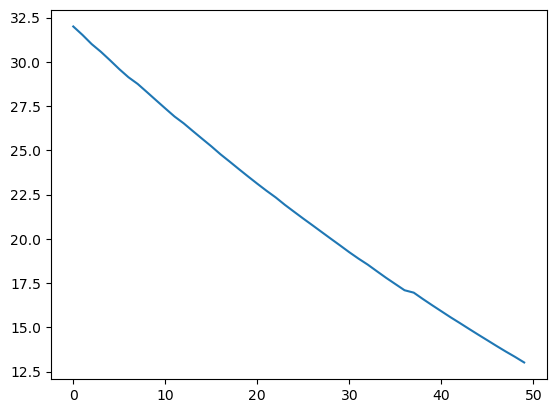

In [ ]:
plt.plot(y_path_out)